In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar100

In [3]:
#splitting training and testing data
(x_train,y_train),(x_test,y_test)=cifar100.load_data()

169001437/169001437 [==============================] - 378s 2us/step


In [75]:
fig_class=["beaver","dolphin","otter","seal","whale",
           "aquarium fish","flatfish","ray","shark","trout",
           "orchids","poppies","roses","sunflowers","tulips",
           "bottles","bowls","cans","cups","plates",
           "apples","mushrooms","oranges","pears","sweet peppers",
           "clock","computer keyboard","lamp","telephone","television",
           "bed","chair","couch","table","wardrobe",
           "bee","beetle","butterfly","caterpillar","cockroach",
           "bear","leopard","lion","tiger","wolf",
           "bridge","castle","house","road","skyscraper",
           "cloud","forest","mountain","plain","sea",
           "camel","cattle","chimpanzee","elephant","kangaroo",
           "fox","porcupine","possum","raccoon","skunk",
           "crab","lobster","snail","spider","worm",
           "baby","boy","girl","man","woman",
           "crocodile","dinosaur","lizard","snake","turtle",
           "hamster","mouse","rabbit","shrew","squirrel",
           "maple","oak","palm","pine","willow",
           "bicycle","bus","motorcycle","pickup truck","train",
"lawn-mower","rocket","streetcar","tank","tractor"]
fig_class.sort()

fig_class[0]

'apples'

In [76]:
x_train[0].shape
#(32*32 and color scheme is RGB)

(32, 32, 3)

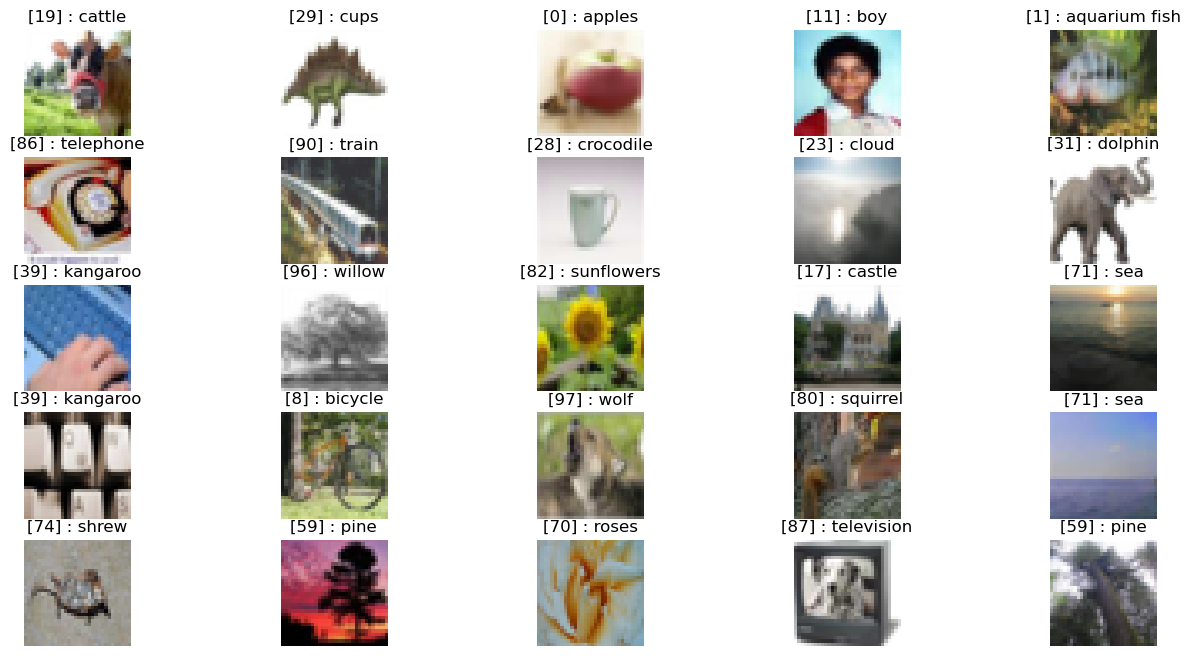

In [134]:
#create figure
fig=plt.figure(figsize=(16,8))

#setting values to rows and columns
rows=5
columns=5

for i in range(25):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(f'{y_train[i]} : {fig_class[int(y_train[i])]}')
#have to fix naming as some are incorrect probably due to different sorting algorithm
    

In [85]:
print(len(x_train))
x_train.shape
#50k worth of train datas

50000


(50000, 32, 32, 3)

In [86]:
print(len(x_test))
x_test.shape
#10k worth of test datas

10000


(10000, 32, 32, 3)

In [87]:
#Searching for max value of pixel
max=0
for i in range(0,50000):
    max_comp=x_train[i].max()
    if (max < max_comp):
        max=max_comp
print (max)

255


In [88]:
#Normalizing our pixels so that it becomes easier to compute
x_train=x_train/max
x_test=x_test/max

In [89]:
from tensorflow.keras.utils import to_categorical
#as we are dealing with multiple classification

In [91]:
y_cat_train=to_categorical(y_train,100)
y_cat_test=to_categorical(y_test,100)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [109]:
#Sequential
model=Sequential()

# 3*3 filter decreases our 32*32 size by 2 in each rows and columns making it 30*30
#relu gives max(0,x)
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (32,32,3), activation='relu'))

# 3*3 filter again decreases by 2 in each rows and columns making it 28*28
# 2*2 maxpoolsize divides size by 2 making 14*14
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 5*5 filter now decreases 14*14 data size to 10*10 by decreasing 4 in each rows and columns
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# 5*5 filter again decreases 10*10 data size to 6*6 by decreasing 4 in each rows and columns
# 2*2 maxpoolsize thus divides 6*6 rows and column to 3*3
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flattens multidimension to single dimension
model.add(Flatten())

model.add(Dense(512, activation='relu'))

#Output layer as 10 categories exist
model.add(Dense(100, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [105]:
model.summary()
#params=output_size * (input_size + 1)  For dense layers
#params=output_channels * (input_channels * window_size + 1) Fro Convolution layers

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 32)        25632     
                                                                 
 conv2d_15 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                  

In [110]:
from tensorflow.keras.callbacks import EarlyStopping
# to prevent overfitting

In [111]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [112]:
model.fit(x_train,y_cat_train,epochs=15,
          validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 24s 15ms/step - loss: 3.9567 - accuracy: 0.0898 - val_loss: 3.5238 - val_accuracy: 0.1648
Epoch 2/15
1563/1563 [==============================] - 21s 14ms/step - loss: 3.3514 - accuracy: 0.1891 - val_loss: 3.1826 - val_accuracy: 0.2247
Epoch 3/15
1563/1563 [==============================] - 22s 14ms/step - loss: 3.0694 - accuracy: 0.2419 - val_loss: 3.0400 - val_accuracy: 0.2537
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 2.8625 - accuracy: 0.2833 - val_loss: 3.0178 - val_accuracy: 0.2624
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 2.7004 - accuracy: 0.3145 - val_loss: 2.9477 - val_accuracy: 0.2780
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 2.5645 - accuracy: 0.3424 - val_loss: 2.8548 - val_accuracy: 0.3015
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 2.4401 - accuracy: 0.3680 - val_loss: 2.9575 -

In [114]:
metrics=pd.DataFrame(model.history.history)

<AxesSubplot:>

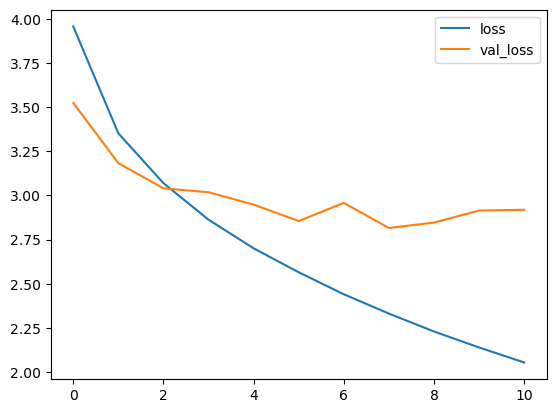

In [115]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

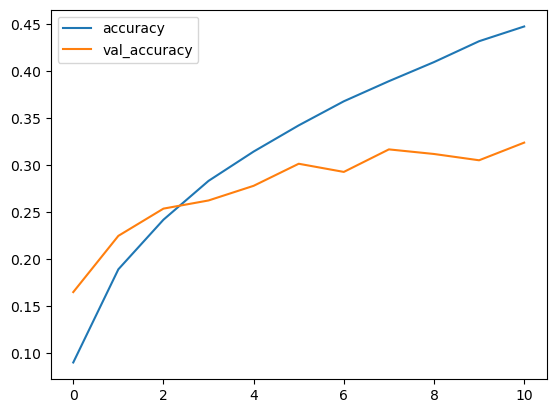

In [116]:
metrics[['accuracy', 'val_accuracy']].plot()

In [117]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 4s 12ms/step - loss: 2.9185 - accuracy: 0.3240


[2.918503522872925, 0.3240000009536743]

In [118]:
prediction = model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [119]:
predictions = [np.argmax(x, axis=0) for x in prediction]

In [120]:
from sklearn.metrics import classification_report, confusion_matrix

In [121]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.51      0.64      0.57       100
           1       0.35      0.41      0.38       100
           2       0.21      0.22      0.21       100
           3       0.16      0.11      0.13       100
           4       0.22      0.08      0.12       100
           5       0.21      0.13      0.16       100
           6       0.30      0.39      0.34       100
           7       0.42      0.33      0.37       100
           8       0.27      0.39      0.32       100
           9       0.36      0.41      0.38       100
          10       0.18      0.09      0.12       100
          11       0.18      0.21      0.20       100
          12       0.29      0.30      0.30       100
          13       0.37      0.22      0.28       100
          14       0.32      0.17      0.22       100
          15       0.18      0.15      0.16       100
          16       0.35      0.31      0.33       100
          17       0.42    

In [122]:
import seaborn as sns

<AxesSubplot:>

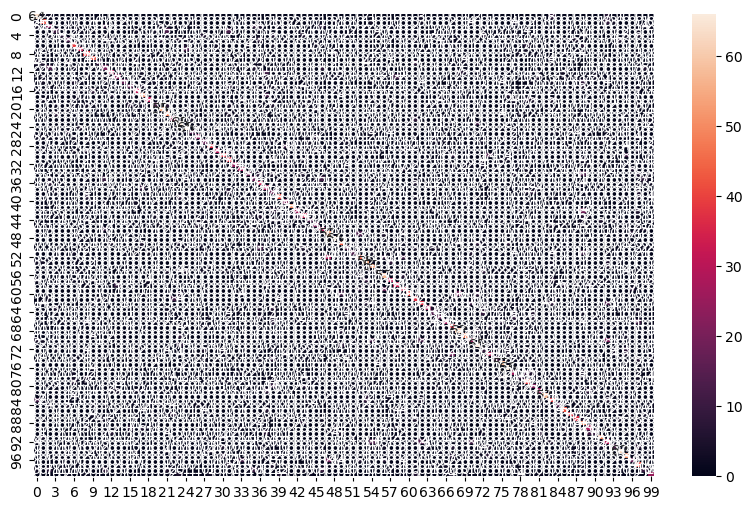

In [123]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [124]:
import random

CORRECT PREDICTIONS


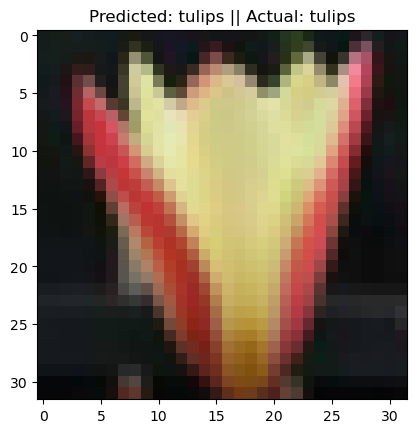

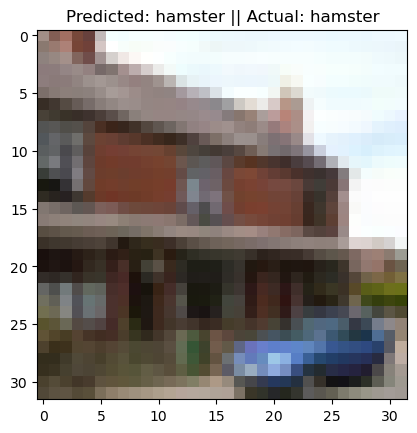

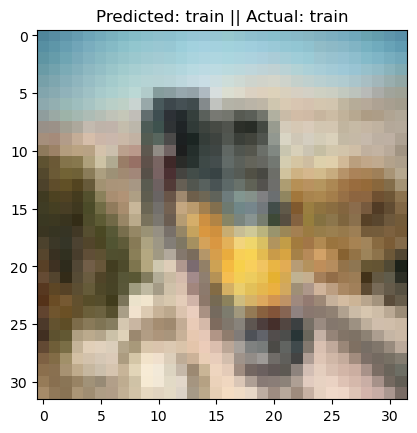

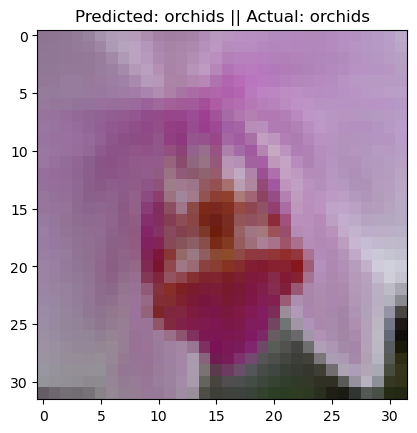

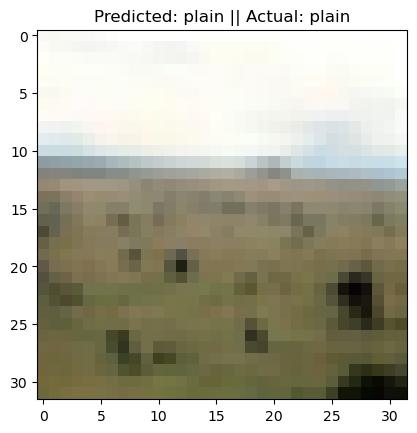

In [125]:
#Lets see which predictions were correct and which were incorrect
count=0
print("CORRECT PREDICTIONS")
#Correct Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    
    #plotting
    if(int(y_test[i])==prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            

INCORRECT PREDICTIONS


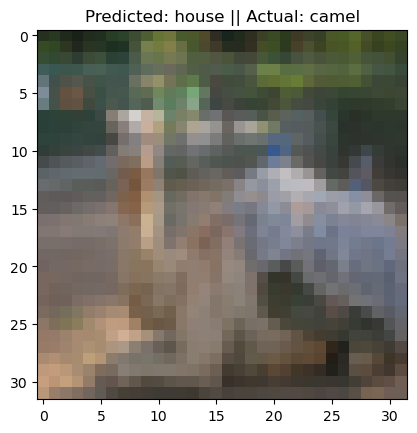

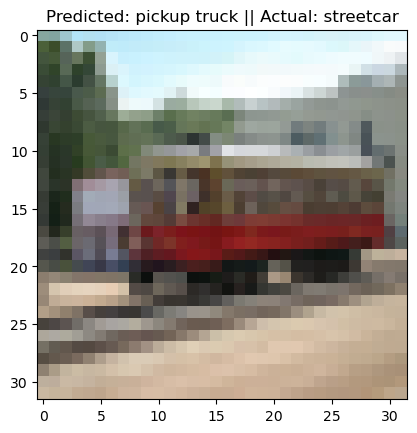

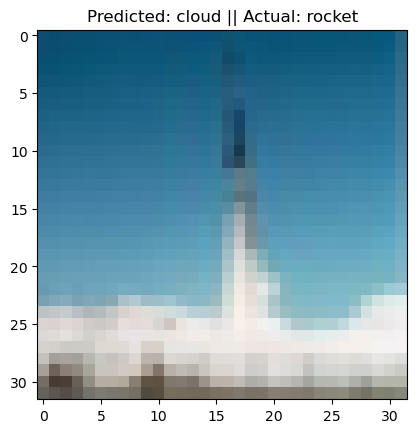

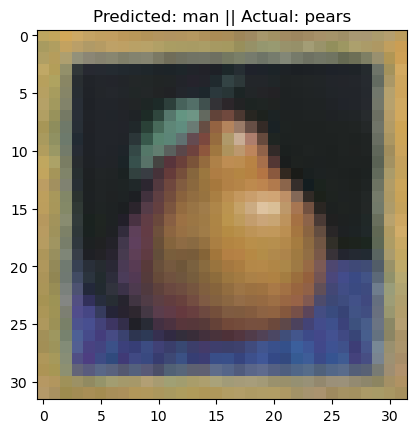

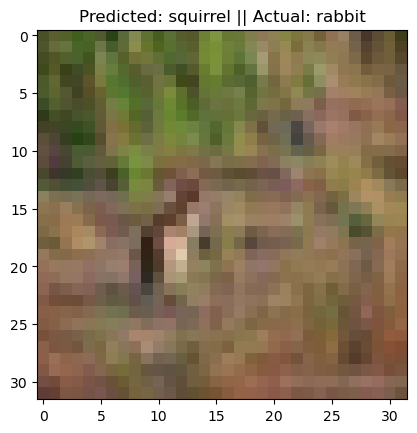

In [126]:
#Lets see which predictions were incorrect 
count=0
print("INCORRECT PREDICTIONS")
#InCorrect Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    
    #plotting
    if(int(y_test[i])!=prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            


In [128]:
def predict_classes(image,index):
    #image_resize=image.resize(32,32)
    image_reshape=image.reshape(1,32,32,3)
    predict_image=model.predict(image_reshape,verbose=0)
    prediction_value=int(np.argmax(predict_image,axis=1))
    plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[int(y_test[index])]}")
    plt.imshow(image)
    plt.show()
    
    

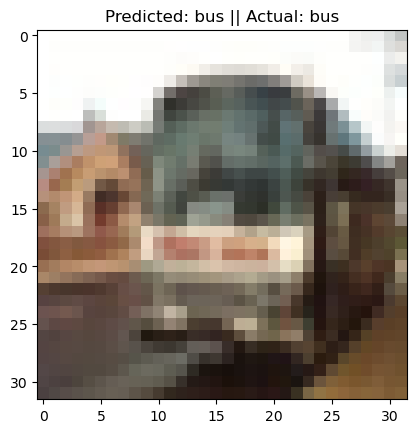

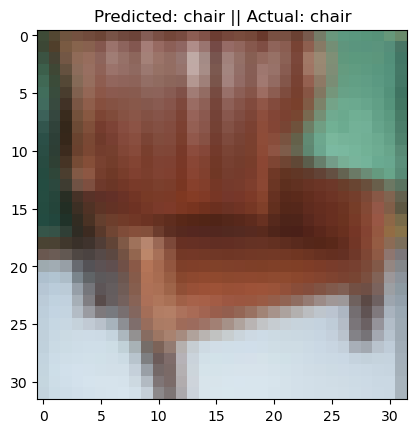

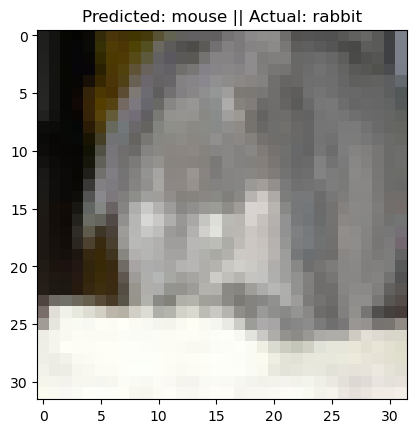

In [129]:
predict_classes(x_test[1034],1034)
predict_classes(x_test[125],125)
predict_classes(x_test[1000],1000)




In [130]:
#save model
model.save('CNN_cfar100_model.h5')

In [131]:
from tensorflow import keras

In [132]:
model2=keras.models.load_model('CNN_cfar100_model.h5')